We import needed libraries and methods.

In [432]:
import os

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom, gaussian_kde

We load the files with p values calculated for shuffled real world data with no differences between the groups.

In [433]:
real_world_p_values_pool_list = []

for file in os.listdir('data/p_values_real_world/'):
    real_world_p_values_from_file = np.loadtxt(f'data/p_values_real_world/{file}', delimiter='\t')
    real_world_p_values_pool_list.append(real_world_p_values_from_file)

real_world_p_values_pool = np.column_stack(real_world_p_values_pool_list) 

In [434]:
real_world_adjusted_p_values_pool_list = []

for file in os.listdir('data/adjusted_p_values_real_world/'):
    real_world_adjusted_p_values_from_file = np.loadtxt(f'data/adjusted_p_values_real_world/{file}', delimiter='\t')
    real_world_adjusted_p_values_pool_list.append(real_world_adjusted_p_values_from_file)

real_world_adjusted_p_values_pool = np.column_stack(real_world_adjusted_p_values_pool_list) 

We find significant p values for each dataset.

We plot the histogram of number of significant findings in independent p values pool along with binomial distribution.

In [435]:
def plot_histogram_and_binomial_with_log_lines(alpha, p_values_pool, color='skyblue', is_adjusted=False):
    p_values_pool_binary = p_values_pool < alpha
    number_of_trues_p_values_pool_binary = np.sum(p_values_pool_binary, axis=0)
    n = p_values_pool_binary.shape[0]
    p = np.mean(number_of_trues_p_values_pool_binary) / n
    
    # Add a small value to all values to handle zero values in log space
    epsilon = 1e-06
    number_of_trues_p_values_pool_binary = number_of_trues_p_values_pool_binary.astype(float) + epsilon
    
    # Kernel Density Estimate for smooth empirical distribution
    kde = gaussian_kde(number_of_trues_p_values_pool_binary, bw_method=1)
    x_kde = np.linspace(np.min(number_of_trues_p_values_pool_binary), np.max(number_of_trues_p_values_pool_binary), 1000)
    y_kde = kde(x_kde) * n

    x_kde = np.concatenate([[epsilon], x_kde, [epsilon]])
    y_kde = np.concatenate([[epsilon], y_kde, [epsilon]])
    
    plt.plot(x_kde, y_kde, label=f'Empirical KDE for alpha={alpha}', color=color, linestyle='--')
    
    if is_adjusted:
        p = alpha
    
    x = np.arange(0, n+1)
    pmf = binom.pmf(x, n, p)
    scaled_pmf = pmf * n
    
    plt.plot(x, scaled_pmf, color=color, label=f'Binomial distribution for n={n}, p={p:.4f}')
  
    return p_values_pool_binary, number_of_trues_p_values_pool_binary

In [436]:
def plot_histogram_and_binomial_with_log_bars(alpha, p_values_pool, bins, color='skyblue', is_adjusted=False):
    p_values_pool_binary = p_values_pool < alpha
    number_of_trues_p_values_pool_binary = np.sum(p_values_pool_binary, axis=0)
    n = p_values_pool_binary.shape[0]
    p = np.mean(number_of_trues_p_values_pool_binary) / n
    
    # Add a small value to all values to handle zero values in log space
    epsilon = 1e-06
    number_of_trues_p_values_pool_binary = number_of_trues_p_values_pool_binary.astype(float) + epsilon
    min_value = np.log10(number_of_trues_p_values_pool_binary.min())
    max_value = np.log10(number_of_trues_p_values_pool_binary.max())
    bin_edges = np.logspace(min_value, max_value, bins)
    plt.hist(number_of_trues_p_values_pool_binary, bins=bin_edges, alpha=0.6, color=color, label=f'Empirical histogram for alpha={alpha}')
    
    if(is_adjusted):
        p = alpha
    
    x = np.arange(0, n+1)
    pmf = binom.pmf(x, n, p)
    scaled_pmf = pmf * n
    
    plt.plot(x, scaled_pmf, color=color, label=f'Binomial distribution for n={n}, p={p:.4f}')
    
    return p_values_pool_binary, number_of_trues_p_values_pool_binary

In [437]:
def plot_histogram_and_binomial_with_bars(alpha, p_values_pool, bins, color='skyblue', is_adjusted=False):
    p_values_pool_binary = p_values_pool < alpha
    number_of_trues_p_values_pool_binary = np.sum(p_values_pool_binary, axis=0)
    n = p_values_pool_binary.shape[0]
    p = np.mean(number_of_trues_p_values_pool_binary) / n
     
    plt.hist(number_of_trues_p_values_pool_binary,bins=bins, alpha=0.6, color=color)
    
    if(is_adjusted):
        p = alpha
    
    x = np.arange(0, n+1)
    pmf = binom.pmf(x, n, p)
    scaled_pmf = pmf * n
    
    plt.plot(x, scaled_pmf, color=color, label=f'Binomial distribution for n={n}, p={p:.4f}')
    
    return p_values_pool_binary, number_of_trues_p_values_pool_binary

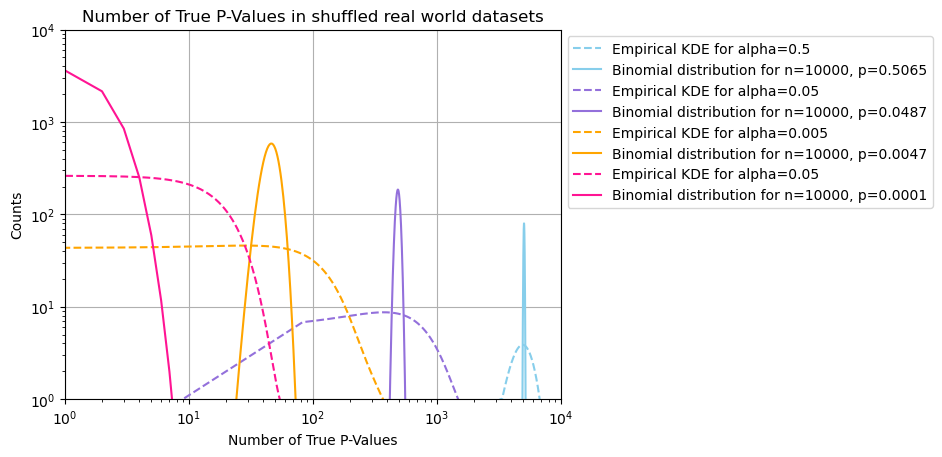

In [438]:
p_values_pool_binary_log_lines_0_5, number_of_trues_p_values_pool_binary_log_lines_0_5 = plot_histogram_and_binomial_with_log_lines(0.5, real_world_p_values_pool, color='skyblue')
p_values_pool_binary_log_lines_0_05, number_of_trues_p_values_pool_binary_log_lines_0_05 = plot_histogram_and_binomial_with_log_lines(0.05, real_world_p_values_pool, color='mediumpurple')
p_values_pool_binary_log_lines_0_005, number_of_trues_p_values_pool_binary_log_lines_0_005 = plot_histogram_and_binomial_with_log_lines(0.005, real_world_p_values_pool, color='orange')
p_values_pool_binary_log_lines_adjusted_0_05, number_of_trues_p_values_pool_binary_log_lines_adjusted_0_05 = plot_histogram_and_binomial_with_log_lines(0.05, real_world_adjusted_p_values_pool, color='deeppink', is_adjusted=False)
plt.xlabel('Number of True P-Values')
plt.ylabel('Counts')
plt.title('Number of True P-Values in shuffled real world datasets')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.xscale('log')
plt.yscale('log')

plt.xlim(1, 10000)
plt.ylim(1, 10000)
plt.show()

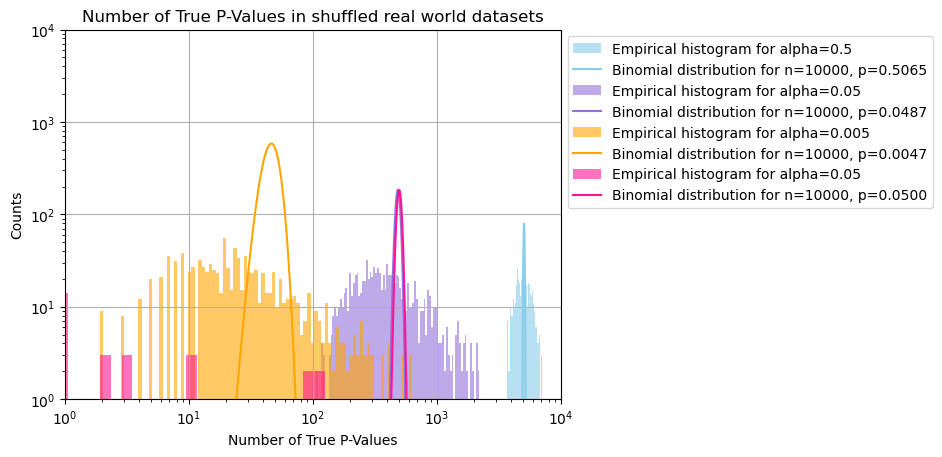

In [439]:
p_values_pool_binary_log_bars_0_5, number_of_trues_p_values_pool_binary_log_bars_0_5 = plot_histogram_and_binomial_with_log_bars(0.5, real_world_p_values_pool, 100, color='skyblue')
p_values_pool_binary_log_bars_0_05, number_of_trues_p_values_pool_binary_log_bars_0_05 = plot_histogram_and_binomial_with_log_bars(0.05, real_world_p_values_pool, 100, color='mediumpurple')
p_values_pool_binary_log_bars_0_005, number_of_trues_p_values_pool_binary_log_bars_0_005 = plot_histogram_and_binomial_with_log_bars(0.005, real_world_p_values_pool, 100, color='orange')
p_values_pool_binary_log_bars_adjusted_0_05, number_of_trues_p_values_pool_binary_log_bars_adjusted_0_05 = plot_histogram_and_binomial_with_log_bars(0.05, real_world_adjusted_p_values_pool, 100, color='deeppink', is_adjusted=True)
plt.xlabel('Number of True P-Values')
plt.ylabel('Counts')
plt.title('Number of True P-Values in shuffled real world datasets')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.xscale('log')
plt.yscale('log')

plt.xlim(1, 10000)
plt.ylim(1, 10000)
plt.show()

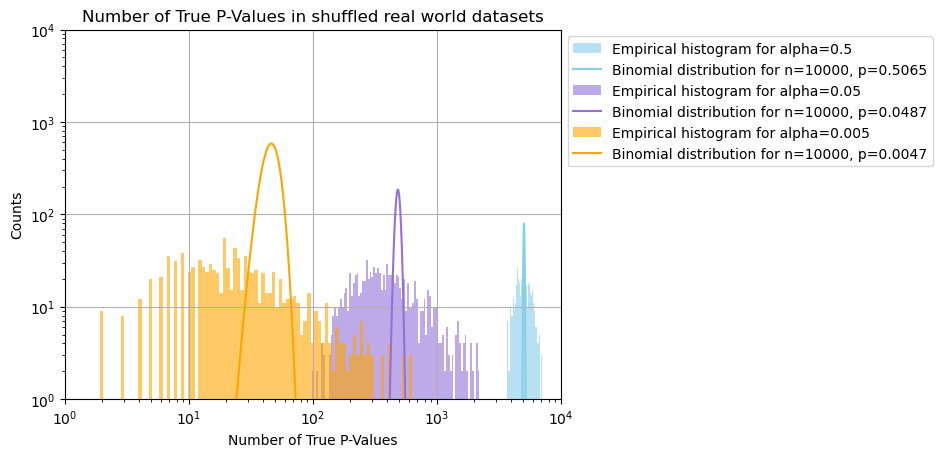

In [441]:
plot_histogram_and_binomial_with_log_bars(0.5, real_world_p_values_pool, 100, color='skyblue')
plot_histogram_and_binomial_with_log_bars(0.05, real_world_p_values_pool, 100, color='mediumpurple')
plot_histogram_and_binomial_with_log_bars(0.005, real_world_p_values_pool, 100, color='orange')
#plot_histogram_and_binomial_with_log_bars(0.05, real_world_adjusted_p_values_pool, 100, color='deeppink', is_adjusted=True)
plt.xlabel('Number of True P-Values')
plt.ylabel('Counts')
plt.title('Number of True P-Values in shuffled real world datasets')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.xscale('log')
plt.yscale('log')

plt.xlim(1, 10000)
plt.ylim(1, 10000)
plt.show()

(1.0, 2000.0)

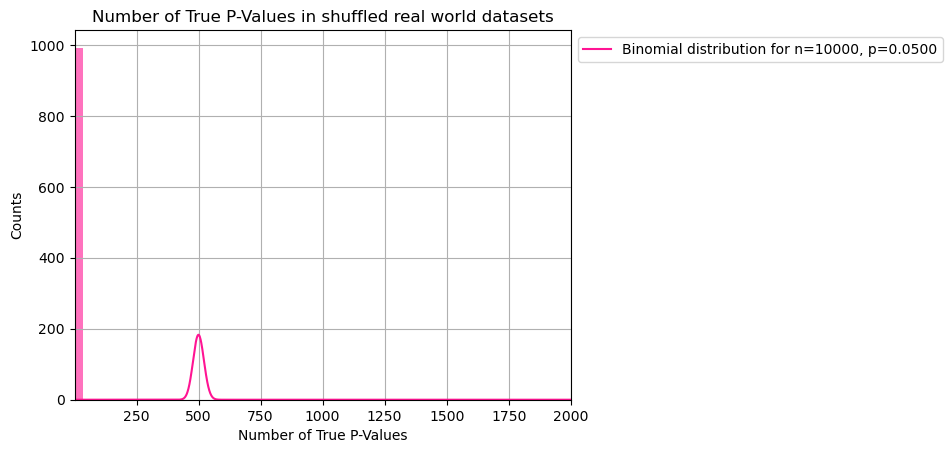

In [442]:
plot_histogram_and_binomial_with_bars(0.05, real_world_adjusted_p_values_pool, 10, color='deeppink', is_adjusted=True)
plt.xlabel('Number of True P-Values')
plt.ylabel('Counts')
plt.title('Number of True P-Values in shuffled real world datasets')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xlim(1, 2000)